In [22]:
include(joinpath("..","src","setup.jl"))

RObject{VecSxp}
$rcalljl_options
$rcalljl_options$width
[1] 800

$rcalljl_options$height
[1] 400




In [23]:
settings = TOML.parsefile("../src/settings.toml")
settings["stimulus"] = Dict("ramp_len_ms" => 10, "pattern" => "aba_", "tone_len_fraction" => 0.41666666)
settings

Dict{AbstractString,Any} with 9 entries:
  "percept_lengths" => Dict{AbstractString,Any}("threshold"=>0.45,"min_length_m…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "mask"            => Dict{AbstractString,Any}("window_ms"=>500,"delta_ms"=>25…
  "rates"           => Dict{AbstractString,Any}("rates_Hz"=>[2, 4, 8, 16, 32],"…
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "stimulus"        => Dict{String,Any}("ramp_len_ms"=>10,"pattern"=>"aba_","to…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"w…
  "bandwidth_ratio" => Dict{AbstractString,Any}("window_ms"=>500,"threshold"=>1…

# Object-level

In [24]:
paramfile = joinpath("..","data","count_lengths","run_2018-10-04","individual_levels_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 11) < 1 &&
  row[:Δf] == 6
end
params[:f_τ_x] = params[:s_τ_x] = params[:t_τ_x] = 750ms

750 ms

In [29]:
result = []
for d in [6]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(50,params,settings,intermediate_results=true))
end

d = 6
[[stim_count, params[:Δt], params[:Δf], params[:f]]; collect(values(settings.stimulus))] = Any[50.0, 240.0 ms, 6.0, 500.0 Hz, 10, "aba_", 0.416667]


┌ Info: 4.38% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


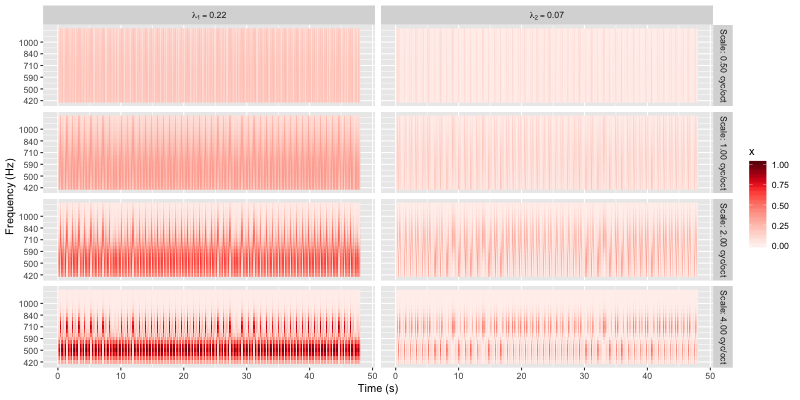

RObject{VecSxp}


In [30]:
rplot(result[1].cohere)

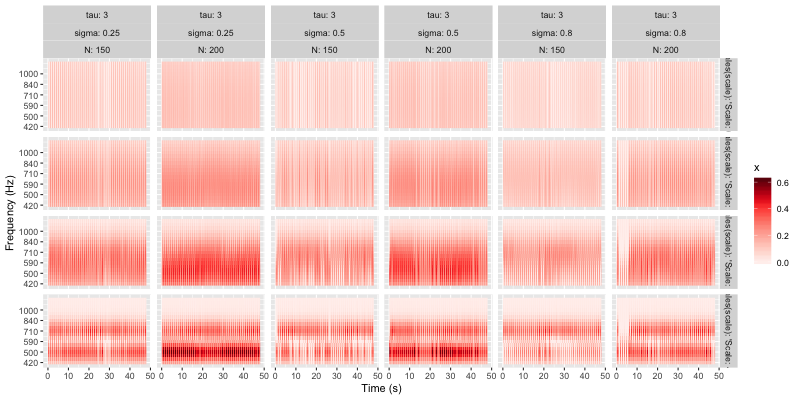

RObject{VecSxp}


In [31]:
rplot(result[1].sources.tracks)

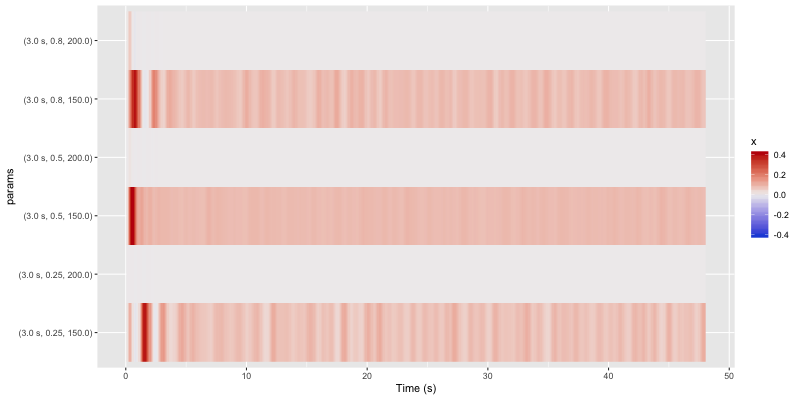

RObject{VecSxp}


In [32]:
rplot(result[1].sources.outweights)

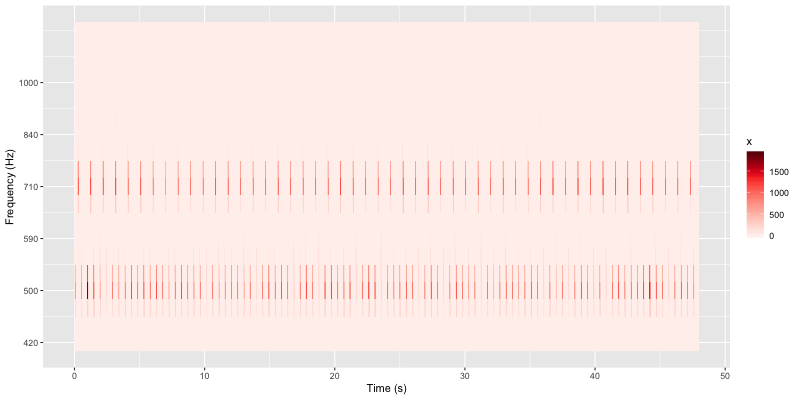

RObject{VecSxp}


In [33]:
rplot(result[1].primary_source)

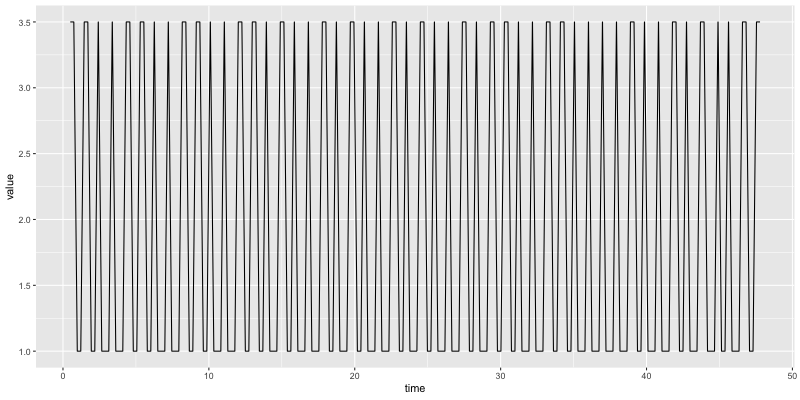

RObject{VecSxp}


In [34]:
rplot(result[1].percepts.ratio)

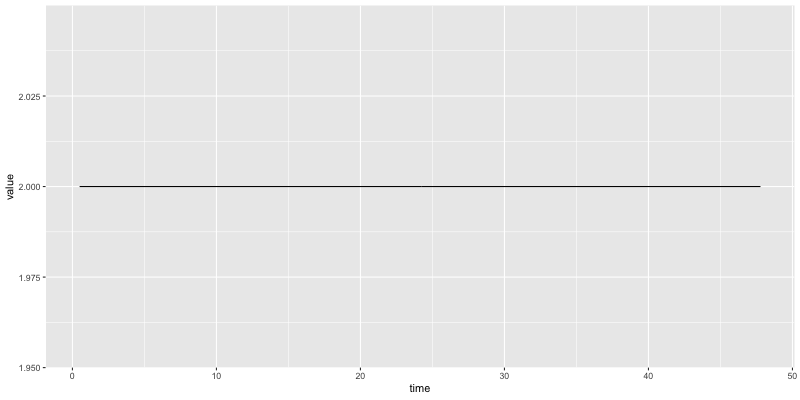

RObject{VecSxp}


In [35]:
rplot(result[1].percepts.tband)

**NEXT STEP**: figure out how to make the above figure be a constant 7 rather than a constant 2 (by adjusting thresholds)

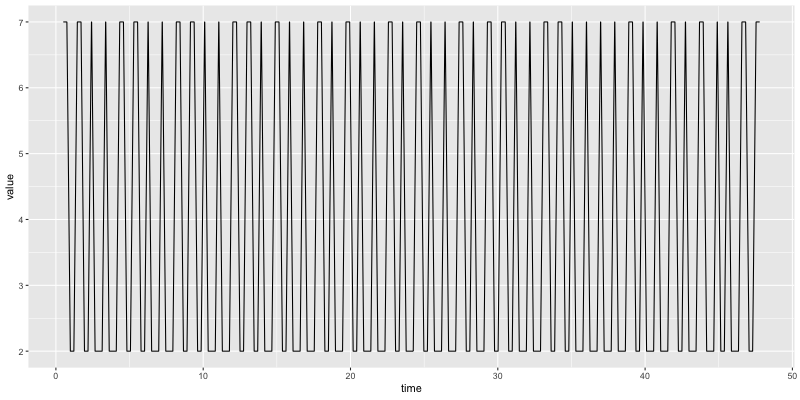

RObject{VecSxp}


In [36]:
rplot(result[1].percepts.sband)

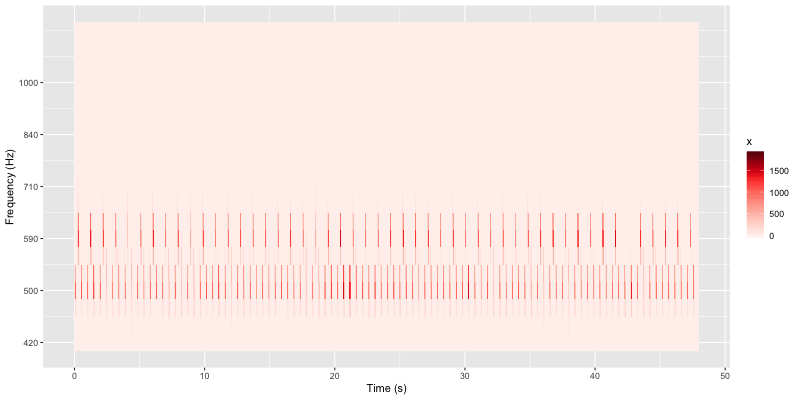

RObject{VecSxp}


In [14]:
rplot(result[1].primary_source)

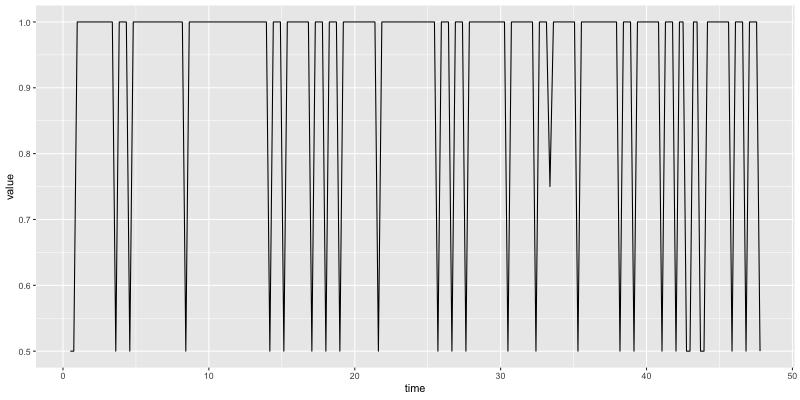

RObject{VecSxp}


In [8]:
rplot(result[1].percepts.ratio)

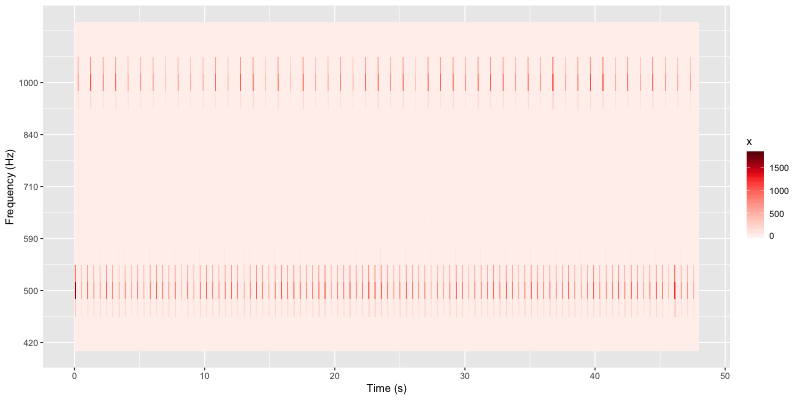

RObject{VecSxp}


In [9]:
rplot(result[3].primary_source)

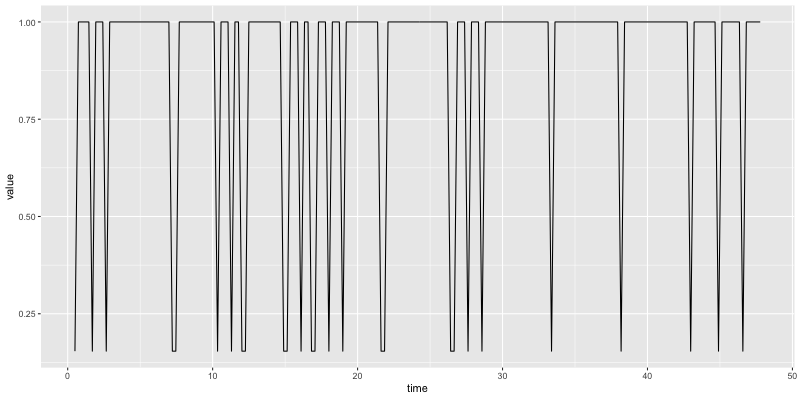

RObject{VecSxp}


In [10]:
rplot(result[3].percepts.ratio)

This looks pretty promising! Let's make sure it works with the other three levels

# Cortical-level

In [11]:
params = getparams(paramfile) do i,row
  abs(row[:s_c_m] - 56) < 1 &&
  abs(row[:s_c_a] - 25) < 1 &&
  row[:Δf] == 6
end

Dict{Symbol,Number} with 35 entries:
  :s_W_m_σ   => 15.0
  :s_τ_x     => 500.0 ms
  :f_τ_m     => 350.0 ms
  :t_W_m_σ_N => 3.0
  :f_τ_x     => 500.0 ms
  :t_τ_σ     => 500.0 ms
  :f_τ_σ     => 500.0 ms
  :Δf        => 6
  :s_τ_a     => 3000.0 ms
  :t_τ_x     => 500.0 ms
  :s_W_m_c   => 6.0
  :f_W_m_c   => 6.0
  :t_W_m_σ_ϕ => 7.0
  :t_τ_m     => 350.0 ms
  :t_τ_a     => 3000.0 ms
  :s_c_a     => 25.1189
  :t_c_σ     => 0.0
  :s_c_x     => 3.0
  :s_τ_m     => 350.0 ms
  :Δt        => 240.0 ms
  :s_c_σ     => 0.2
  :f_τ_a     => 3000.0 ms
  :s_c_m     => 56.2341
  :f_c_a     => 0.0
  :t_W_m_c   => 6.0
  ⋮          => ⋮

In [12]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(50,params,settings,intermediate_results=true))
end

d = 3


┌ Info: 0.62% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


d = 6
d = 12


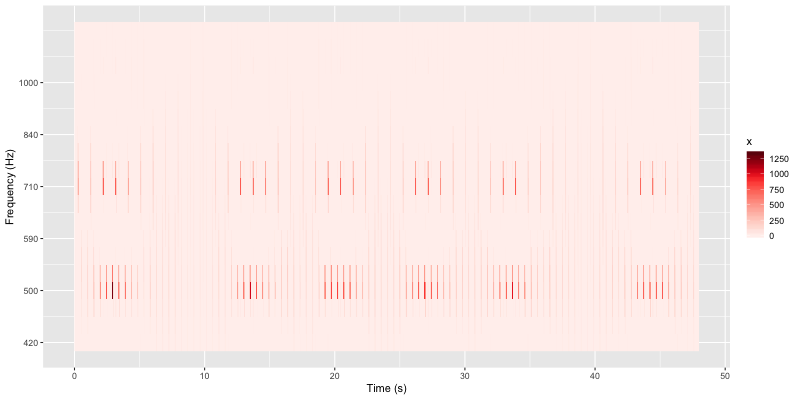

RObject{VecSxp}


In [13]:
rplot(result[2].primary_source)

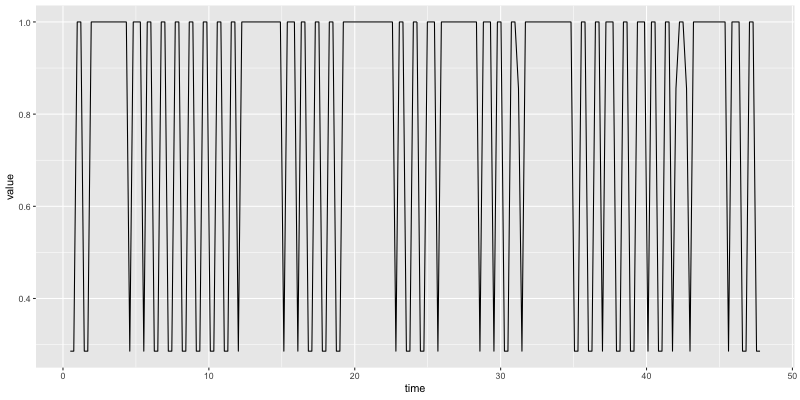

RObject{VecSxp}


In [14]:
rplot(result[2].percepts.ratio)

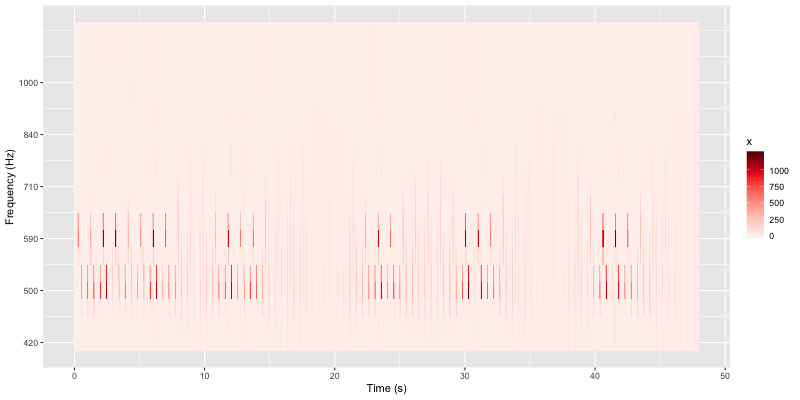

RObject{VecSxp}


In [15]:
rplot(result[1].primary_source)

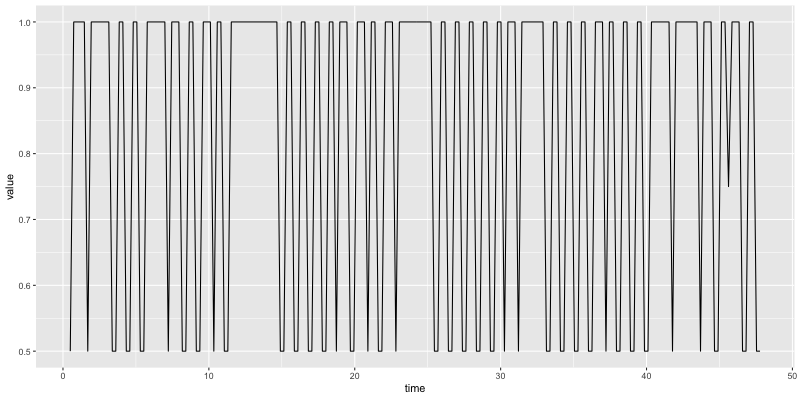

RObject{VecSxp}


In [16]:
rplot(result[1].percepts.ratio)

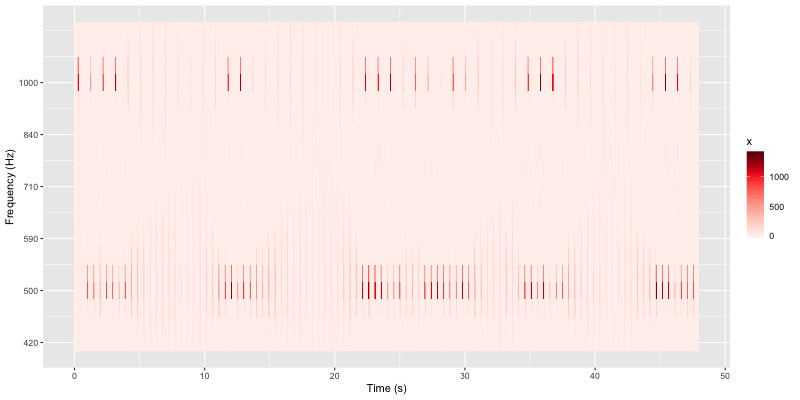

RObject{VecSxp}


In [17]:
rplot(result[3].primary_source)

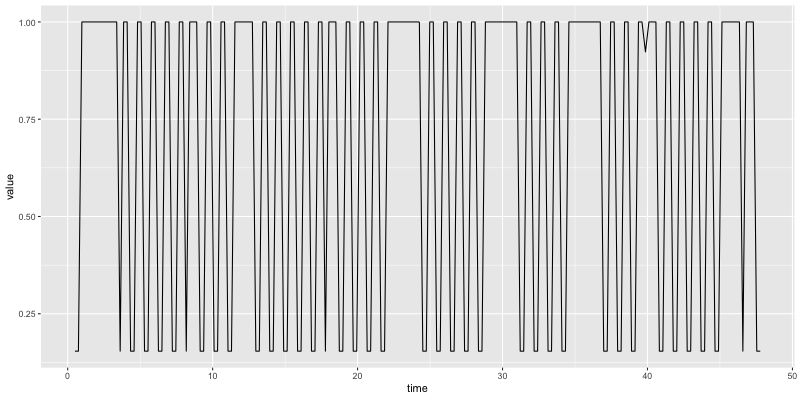

RObject{VecSxp}


In [18]:
rplot(result[3].percepts.ratio)

# Peripheral-level

In [19]:
params = getparams(paramfile) do i,row
  abs(row[:f_c_m] - 32) < 1 &&
  abs(row[:f_c_a] - 5) < 1 &&
  row[:Δf] == 6
end

Dict{Symbol,Number} with 35 entries:
  :s_W_m_σ   => 15.0
  :s_τ_x     => 500.0 ms
  :f_τ_m     => 350.0 ms
  :t_W_m_σ_N => 3.0
  :f_τ_x     => 500.0 ms
  :t_τ_σ     => 500.0 ms
  :f_τ_σ     => 500.0 ms
  :Δf        => 6
  :s_τ_a     => 3000.0 ms
  :t_τ_x     => 500.0 ms
  :s_W_m_c   => 6.0
  :f_W_m_c   => 6.0
  :t_W_m_σ_ϕ => 7.0
  :t_τ_m     => 350.0 ms
  :t_τ_a     => 3000.0 ms
  :s_c_a     => 0.0
  :t_c_σ     => 0.0
  :s_c_x     => 3.0
  :s_τ_m     => 350.0 ms
  :Δt        => 240.0 ms
  :s_c_σ     => 0.0
  :f_τ_a     => 3000.0 ms
  :s_c_m     => 0.0
  :f_c_a     => 5.01187
  :t_W_m_c   => 6.0
  ⋮          => ⋮

In [20]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(50,params,settings,intermediate_results=true))
end

d = 3
d = 6
d = 12


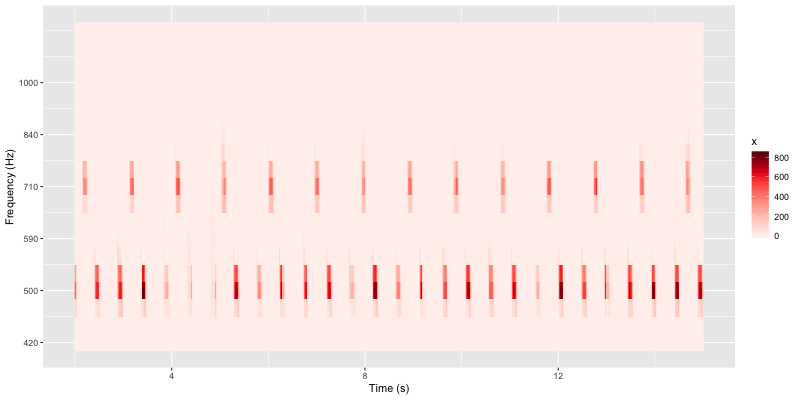

RObject{VecSxp}


In [21]:
rplot(result[2].primary_source[2s .. 15s])

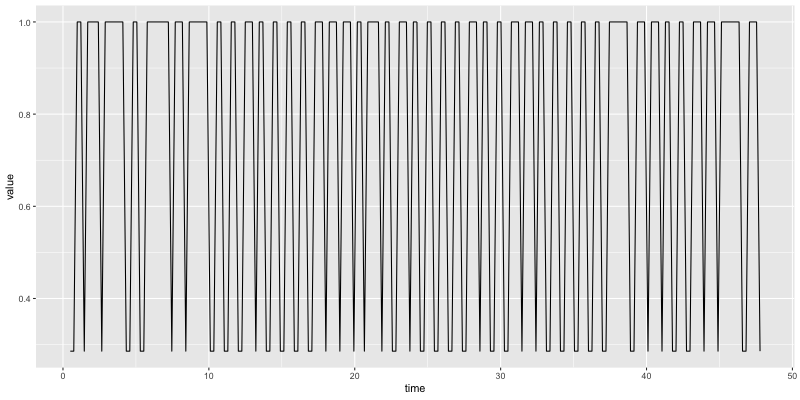

RObject{VecSxp}


In [22]:
rplot(result[2].percepts.ratio)

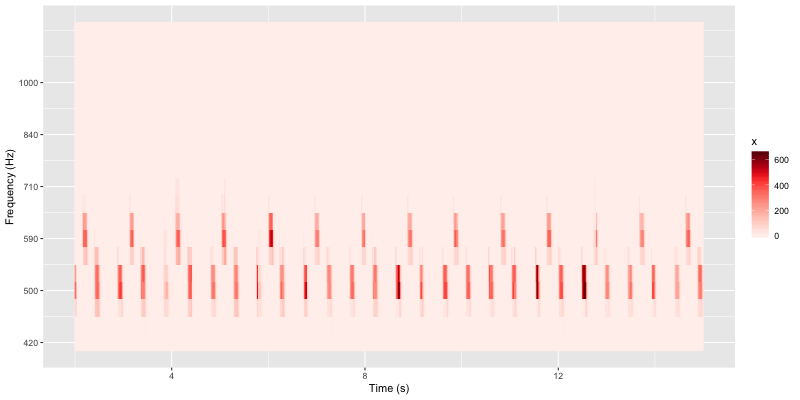

RObject{VecSxp}


In [23]:
rplot(result[1].primary_source[2s .. 15s])

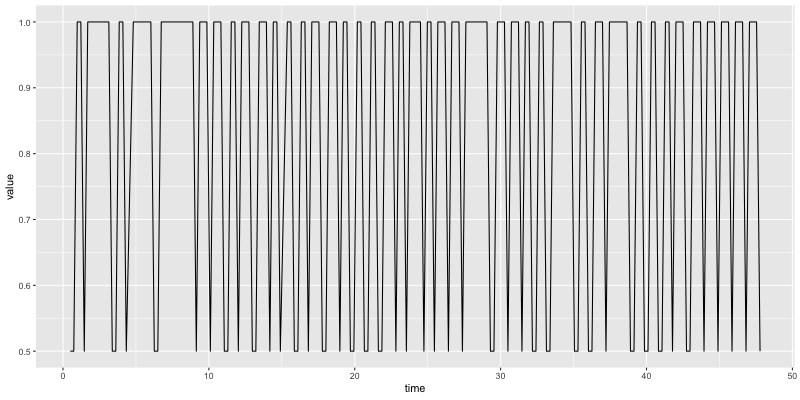

RObject{VecSxp}


In [24]:
rplot(result[1].percepts.ratio)

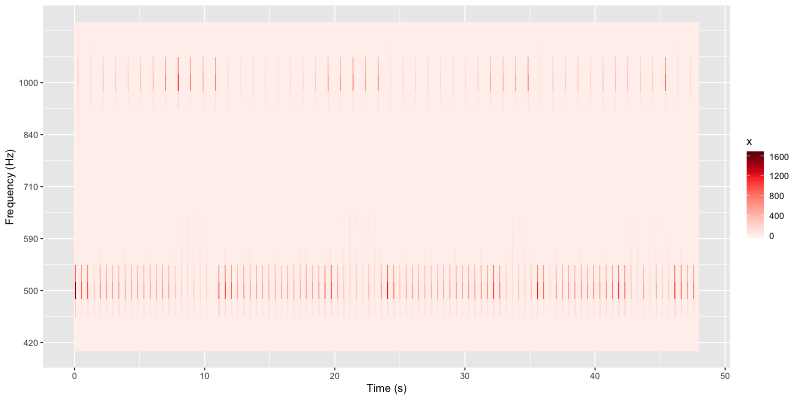

RObject{VecSxp}


In [25]:
rplot(result[3].primary_source)

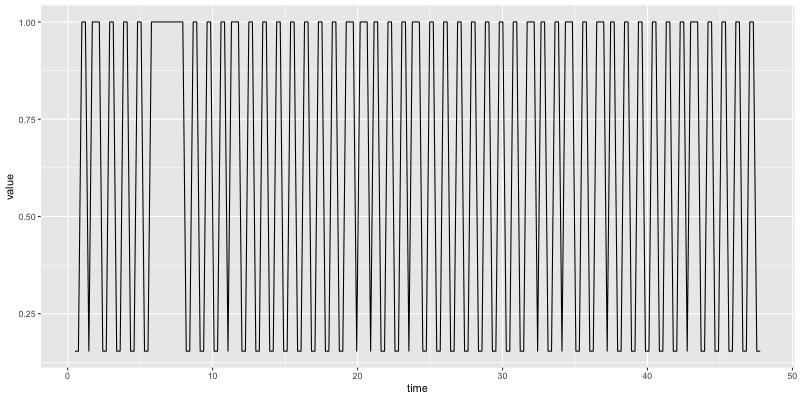

RObject{VecSxp}


In [26]:
rplot(result[3].percepts.ratio)